### **Imports**

In [383]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import holidays
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.feature_selection import chi2
from sko.PSO import PSO
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from scipy.stats import ttest_rel
from statistics import mean, stdev
import shap
import joblib
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import torch
from torch import Tensor
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.nn import Module, Linear, ReLU, Softmax, CrossEntropyLoss
from torchinfo import summary
from torch.optim import SGD, Adam
from IPython.display import display
from livelossplot import PlotLosses
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [384]:
print(torch.__version__)

2.9.0+cu130


In [ ]:
# Carregamento de Dados
test = pd.read_csv(r'../datasets/test_data_cleaned.csv')
train = pd.read_csv(r'../datasets/training_data_cleaned.csv')

In [386]:
y = train['AVERAGE_SPEED_DIFF']
X = train.drop(columns=['AVERAGE_SPEED_DIFF'])
X_test = test.copy()

### **Model Training**

### *Artificial Neural Networks*

In [ ]:
# 1. Separar um conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2025)

# 2. Pré-processamento
smote = SMOTE(random_state=2025)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

num_classes = 5
y_train_cat = to_categorical(y_train_resampled, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)

# 3. Definição da Arquitetura (Feedforward MLP)
model = Sequential([

    # Camada 1
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],), kernel_regularizer=l2(0.0001)),
    BatchNormalization(), 
    Dropout(0.3),
   
    # Camada 2
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    # Camada 3
    Dense(32, activation='relu'),
    Dropout(0.2),

    # Saída
    Dense(num_classes, activation='softmax')
])

optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

# 4. Compilação do Modelo
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



# 5. Configuração do Early Stopping e ReduceLROnPlateau
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,          
    restore_best_weights=True,
    verbose=1
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_loss',
    patience=3,    
    factor=0.5,  
    min_lr=1e-6,    
    verbose=1      
)

# 6. Treino
history = model.fit(
    X_train_resampled, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=100,
    batch_size=128,          
    callbacks=[early_stopping, lr_reduction],
    verbose=1
)

Epoch 1/100


c:\Users\Luimp\anaconda3\envs\DAA\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3865 - loss: 1.5094 - val_accuracy: 0.3815 - val_loss: 1.5125 - learning_rate: 0.0010
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5315 - loss: 1.1087 - val_accuracy: 0.4409 - val_loss: 1.3671 - learning_rate: 0.0010
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5751 - loss: 0.9622 - val_accuracy: 0.4908 - val_loss: 1.2013 - learning_rate: 0.0010
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6130 - loss: 0.8677 - val_accuracy: 0.5913 - val_loss: 1.0086 - learning_rate: 0.0010
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6346 - loss: 0.8165 - val_accuracy: 0.5913 - val_loss: 0.9223 - learning_rate: 0.0010
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6644 - loss: 0.7503 - val_accuracy: 0.5994 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6762 - loss: 0.7197 - val_accuracy: 0.608

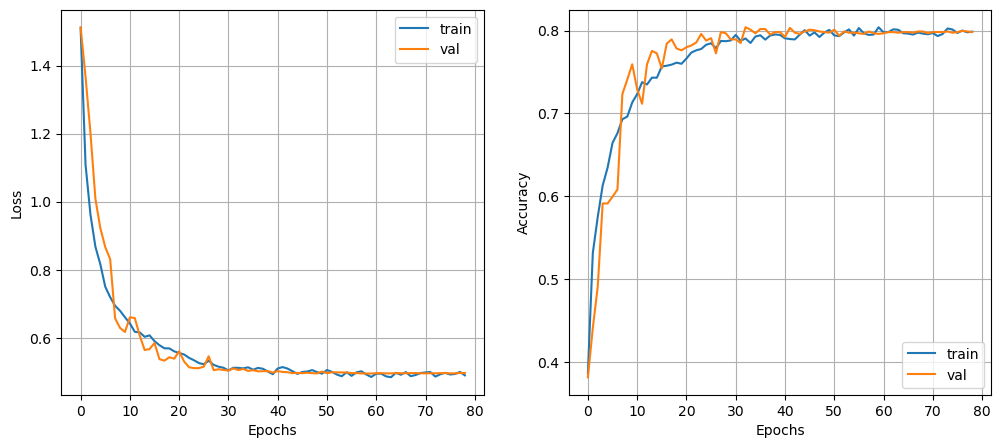

In [388]:
# Plot da Loss (Perda)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot da Accuracy (Precisão)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

In [389]:
# 7. Resultados
print(f"\nMelhor Val Loss: {min(history.history['val_loss']):.4f}")
print(f"Melhor Val Accuracy: {max(history.history['val_accuracy']):.4f}")

# Previsão 
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
print(classification_report(y_val, y_pred))


Melhor Val Loss: 0.4954
Melhor Val Accuracy: 0.8041
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       431
           1       0.69      0.68      0.69       275
           2       0.84      0.74      0.79       357
           3       0.75      0.75      0.75       208
           4       0.72      0.86      0.79        92

    accuracy                           0.80      1363
   macro avg       0.77      0.79      0.78      1363
weighted avg       0.80      0.80      0.80      1363



### **Submission Preparation**

In [390]:
# Exportar modelo treinado
import joblib
joblib.dump(model, 'ANN.pkl')

['ANN.pkl']

In [391]:
df_test = pd.read_csv('Datasets/test_data_cleaned.csv')
X_test = df_test.values.astype('float32')
X_test_tensor = torch.tensor(X_test).to(device)

In [392]:
# Prever
y_pred_probs = model.predict(X_test)
# Obter a classe com maior probabilidade
y_test = np.argmax(y_pred_probs, axis=1)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [393]:
# Desmapeamento dos valores preditos para as categorias originais
inverse_map = {0: 'None', 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very_High'}
y_test = pd.Series(y_test).map(inverse_map)

In [394]:
# Criar CSV de submissão
submission = pd.DataFrame({'RowId': range(1, len(X_test)+1), 'Speed_Diff': y_test})
submission.to_csv('submission.csv', index=False)